# CMSC478 Machine Learning - Spring 2021

## Instructor: Fereydoon Vafaei

### Assignment-3: Multi-Class Classification and PCA

*Caleb M. McLaren, CU01417 

## Overview and Learning Objectives

In Assignment-3, you're going to perform a multi-class classification task. You'll also practice with PCA.

As discussed in the lectures, multi-class classification means your model classifies multiple (more than two) classes/labels. You are going to build a classifier that can predict orthopedic disease (three classes).

<b>Course Policy Reminder:</b>
Debugging and error resolution are always students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!**

Pedagogically, this assignment will help you:
- better understand multi-classification and the challenge of imbalanced datasets
- better understand and practice with PCA

## Part-I Multi-Class Classification with Imbalanced Dataset

You are going to work with "**the biomechanical features of orthopedic patients**" dataset. You can download the data and read the descriptions in the [kaggle page](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients).

- There are two versions of this dataset. Make sure to download `column_3C_weka.csv` which has three classes.

- The ML task is classifying patients as belonging to one out of three categories in `class` column: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients). 

Follow the instructions for each step very carefully.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct.

The first step is importing all necessary python and sklearn modules. **You definitely need to add to the following imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this cell.

In [1]:
# Import all the necessary modules from python and sklearn
# You may start with pandas, numpy and matplotlib,
# and keep adding the necessary modules here as you move forward

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score, classification_report

In [2]:
# Load the column_3C_weka.csv data as a dataframe using pandas
threeCdf = pd.read_csv(r"column_3C_weka.csv")
threeCdf

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


> This data is very clean; thus the preprocessing is minimal; however, you should always check if there is any NAs.

In [3]:
threeCdf.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

> Your target column for classification is `class`.

In [4]:
# Get feature vector X (all columns but "class") and target label y as "class"
X = threeCdf[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y = threeCdf['class']



In [5]:
# Print X shape and head
print(X.shape)
X.head(10)

(310, 6)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [6]:
# Print y shape, head, unique values and number of instances in each class
print(y.shape)
unq = pd.unique(y)
print(unq)
class_count = y.value_counts()
print(class_count)

(310,)
['Hernia' 'Spondylolisthesis' 'Normal']
Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64


> This indicates that the dataset is imbalanced meaning the number of instances in each class is not balanced, so you should be careful with model evaluation as working with imbalanced data requires specific performance metrics that can address the issue of unequal distribution of labels.

> <b>Note:</b> The output of the following cell is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and should be verified by this output.

In [7]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(217, 6)
(217,)
(93, 6)
(93,)


Next, you're going to build a classifier. Some classifiers like [Random Forests in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can directly be applied on multi-class classification and there is no need to use OvO and OvR strategies, so let's try RF for this problem.

You may start with default hyperparameters, but you should definitely fine-tune them as described in the following cell to achieve at least 0.78 for mean cv score. Your cv `scoring` parameter should use `balanced_accuracy` as its metric. Also notice that - as discussed in the lectures - you must apply `cross_val_score` on the whole dataset (not just train or test). You may see the full documentation of `cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

> **Note**: [The balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) in binary and multiclass classification tasks deals with imbalanced datasets. It is defined as the average of recall obtained on each class, so in this case the average of recall between three classes.

In [8]:
# Create a RandomForestClassifier - You may start with default hyperparameters,
# but you should fine-tune them to achieve at least 0.78 for mean cv score
# Set the random_state=42
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [9]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'
# Hint: cross validation should be done on the whole dataset

rf_cv_score = cross_val_score(rf_clf, X, y, scoring="balanced_accuracy")

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.8066666666666666


> Next, you're going to plot the impact of `n_estimators` hyperparameter on mean cv score. Read the comments in the following cell. cv `scoring` will still be `balanced_accuracy`. 

> **Note**: The following plot is given for your reference. However, notice that due to randomness, there might be slight differences, but the trend should be similar. Running this cell may take a few minutes.

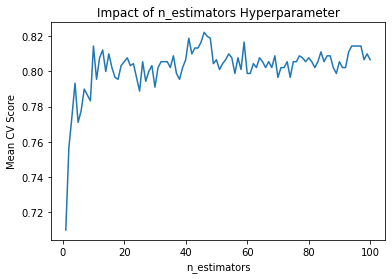

In [10]:
# Plot the impact of n_estimators hyperparameter on mean cv score as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do a 10-fold cv with scoring='balanced_accuracy' and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have the title "Impact of n_estimators Hyperparameter", and the correct label for each axis
# Incomplete/incorrect plots will get zero

rf_mean_cv_scores = []
n_est_list = range(1, 101)

for i in n_est_list:
    rf_clf = RandomForestClassifier(n_estimators=i,random_state=42)
    rf_cv_score = cross_val_score(rf_clf, X, y, scoring="balanced_accuracy")
    rf_mean_cv_scores.append((i, rf_cv_score.mean()))
    
temp_x, temp_y = zip(*rf_mean_cv_scores)
plt.title("Impact of n_estimators Hyperparameter")
plt.xlabel("n_estimators")
plt.ylabel("Mean CV Score")
plt.plot(temp_x, temp_y)

In [11]:
# Fit the rf_clf on the training set

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Get feature_importances of rf for all features
for name, score in zip(threeCdf, rf_clf.feature_importances_):
    print(name, score)

pelvic_incidence 0.10991466050024118
pelvic_tilt 0.06850481824080373
lumbar_lordosis_angle 0.1478681491327059
sacral_slope 0.1526164926549674
pelvic_radius 0.09585001955913562
degree_spondylolisthesis 0.4252458599121461


In [13]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [14]:
# Get the balanced accuracy of predictions on the test set
balanced_acc = balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.7894585253456222

> The classification report reflects the challenge of this imbalanced dataset and clearly shows that the results for different classes significantly vary due to the imbalanced classes.

In [15]:
# Get classification report # Note: You must import the related module/method from sklearn to run this cell
class_rep = classification_report(y_test, y_pred)
print(class_rep)

                   precision    recall  f1-score   support

           Hernia       0.61      0.79      0.69        14
           Normal       0.77      0.65      0.70        31
Spondylolisthesis       0.92      0.94      0.93        48

         accuracy                           0.82        93
        macro avg       0.77      0.79      0.77        93
     weighted avg       0.82      0.82      0.82        93



### Part-I Questions

Answer the following question HERE:

   Q1 [4 points] - According to `feature_importance` of RF classifier, (which works based on the average impurity reduction of the feature across all trees of the forest) what are the most important features in predicting `class`? Name the top three.
   
    A1 - The top three features are, in descending order, degree_spondylolisthesis, lumbar_lordosis_angle, and sacral_slope. 

Q2 [2 points]- According to your plot of the impact of n_estimators on cv score, what is the best range for n_estimators?
    
    A2 - According to my plot, there is a percentage point to be gained in the range of 38 - 45 n_estimators, barring the inital gains during the first 1 - 10 estimators. 

Q3 [4 points] - According to classification report of RF classifier, which class is relatively easier to classify? Which class is the hardest to predict? 
    
    A3 - According to classification_report, spondylolisthesis is the easiest to identify. Normal should be the hardest to predict, with only 69/100 predictions being true postives. Normal had a better recall than Hernia because it predictied positive too often, and ended up identifying most of the Normal cases along with all the false positives. 



## Part II - PCA

In Part II, you're going to use PCA for dimensionality reduction.

In [16]:
# Create a pca with 3 principal components, and apply it on X and store the transformed data in X3D
pca = PCA(n_components = 3)
X3D = pca.fit_transform(X)

In [17]:
X3D.shape

(310, 3)

In [18]:
type(X3D)

numpy.ndarray

In [19]:
# Check the pca components
pca.components_.T[:,0]

array([ 0.32364565,  0.11319229,  0.30367474,  0.21045336, -0.02995983,
        0.86315378])

In [20]:
# Get the list of explained variance ratios for three PCs
pca.explained_variance_ratio_

array([0.70963571, 0.13759529, 0.07521804])

> You can see the coefficients of each Principal Component (PC) corresponding to each feature as each PC is a linear combination of features.

In [21]:
pc_df = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3'])
pc_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
PC-1,0.323646,0.113192,0.303675,0.210453,-0.029960,0.863154
PC-2,-0.476635,-0.098563,-0.532784,-0.378072,0.321809,0.482438
PC-3,-0.001545,-0.264657,-0.496542,0.263113,-0.774613,0.118941


In [22]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X3D_train, X3D_test, y_train, y_test = train_test_split(X3D, y, test_size=0.30)
print(X3D_train.shape)
print(y_train.shape)
print(X3D_test.shape)
print(y_test.shape)

(217, 3)
(217,)
(93, 3)
(93,)


In [23]:
# Create a RF classifier, set random_state=42, other hyperparameters should be the same as you tuned before
rf_clf = RandomForestClassifier(n_estimators=40,random_state=42)

In [24]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'
# cross validation should be done on X3D and y
rf_cv_score_3D = cross_val_score(rf_clf, X3D, y, scoring="balanced_accuracy")

print("Mean cv Score - Random Forest: ", rf_cv_score_3D.mean())

Mean cv Score - Random Forest:  0.7333333333333334


> So the mean cv score dropped after dimensionality reduction. We may have missed some information after PCA, but let's also check balanced accuracy on the test set.

In [25]:
# Fit the rf_clf on X3D_train
rf_clf.fit(X3D_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

In [26]:
# Make predictions on X3D_test
y_pred_3D = rf_clf.predict(X3D_test)

In [27]:
# Get the balanced accuracy of predictions on X3D_test
balanced_acc_3D = balanced_accuracy_score(y_test, y_pred_3D)
balanced_acc_3D

0.7312409812409811

In [28]:
# Get classification report of RF on X3D_test predictions
print(classification_report(y_test, y_pred_3D))

                   precision    recall  f1-score   support

           Hernia       0.71      0.48      0.57        21
           Normal       0.61      0.79      0.69        28
Spondylolisthesis       0.95      0.93      0.94        44

         accuracy                           0.78        93
        macro avg       0.76      0.73      0.73        93
     weighted avg       0.80      0.78      0.78        93



> The balanced accuracy of the test set `X3D_test` dropped too, thus we need a methodic approach to find out the optimal number of PCs and the level of dimensionality reduction. One way is using the plot of explained variance ratio as a function of the number of dimensions (PCs).

> As the final step, you should plot the cumulative explained variance as a function of the number of principal components. This plot can tell you what the optimal number of PCs is.

> The cumulative explained variance of $n$ PCs is the sum of explained variance ratios of the first $n$ PCs. For example, the cumulative explained variance of two PCs is the sum of explained variance ratio of the first PC, i.e. 0.70963571, plus the 2nd PC, i.e. 0.13759529, thus it is 0.847231 (check the values of `explained_variance_ratio_`).

> **Hint**: You can use `np.cumsum` method to compute the cumulative explained variance (sum of explained variance ratio as a function of number of PCs).

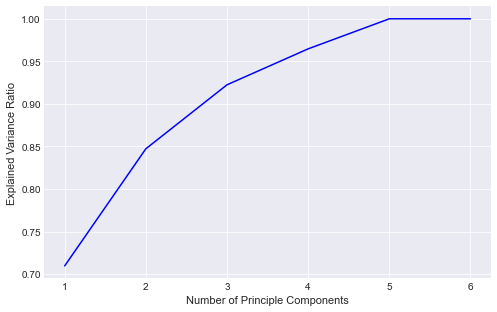

In [29]:
# Plot the cumulative explained variance as a function of number of principal components
# The plot should have `seaborn` style
# The plot should have correct axis labels, xticks/labels (1,2,3,4,5,6 number of PCs) precisely as the plot below
X_r_cumsum_values = []
range_components = [1,2,3,4,5,6]

for i in range_components:
    pca = PCA(n_components=i)
    X_reduced = pca.fit(X)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    X_r_cumsum_values.append(cumsum[-1])


plt.figure(figsize=(8,5))
plt.style.use("seaborn-dark")
plt.grid(True)
plt.xlabel("Number of Principle Components",fontsize=11)
plt.ylabel("Explained Variance Ratio",fontsize=11)

components = range_components
ratio = X_r_cumsum_values
plt.plot(components, ratio, "b")


### Part II Questions

Anwser the following question HERE:

Q4 [4 points] - Specify for each PC, which feature has the highest correlation (absolute value of the corresponding coeffieicent) with that PC? You should name the feature that has the highest (absolute value) coefficient in the `pc_df` dataframe above - the one which has PCs as rows.

    A4 - For PC1, the feature with the highest correlation is degree_spondylolisthesis.For PC2, lumbar_lordosis_angle has the highest absolute correlation. Finally, pelvic_radius and PC3 are the most correlated. 

Q5 [4 points] - Which of the 6 features has the highest importance in random forest `feature_importances_` which also has a high correlation with one of the 3 PCs returned by PCA? Notice that this can be an indication of consistency between PCA results and `feature_importances_` of RF classifier.

    A5 - Previously, the random forest feature_importance reported degree_spondylolisthesis, lumbar_lordosis_angle, and sacral_slope as the leading predictive features of an instance. Theses ovarlap well with the principal component analysis selection of degree_spondylolisthesis, lumbar_lordosis_angle, and pelvic_radius as the leading features for defining the best hyperplane.  

Q6 [12 points]
- **(a)** [2 points] - Based on the explained variance ratio plot, what is an appropriate number for principal compoenents if the goal is to preserve at least 97% of variance?

    A6.a - Ninety-seven percent of the variance is observed to be preserved by at least five principal compononents. 


- **(b)** [5 points] What is the exact value of cumulative explained variance (a float number with two decimal places) when the number of principal components is 4? The cumulative explained variance for $n$ PCs is the sum of explained variance ratio of the first $n$ PCs. To answer this part, you must add a code cell below and get the cumulative explained variance when the number of PCs is four.

    A6.b - The cumulative explained variance of 4 principle components is 0.9647 which would commonly be rounded up to 0.965 and then 0.97. 
    (N.b.: I accomplished this cumulative math during the prep work for graphing the cumulative explained variance above. Below, I have only to print out the list "ratio".


In [30]:
# These cumulative explained variance were calculated above, 
# during the prep work required to present the graph. The floats below 
# correspond with 1 - 6 principle components cumulatvie explained variance. 
print(ratio)

[0.709635711732353, 0.8472310024014331, 0.9224490401218362, 0.9646917964216531, 1.0, 1.0]


- **(c)** [5 points] Based on your answer to the part (a) and (b) of Q6, what is the mean cv score if you reduce to the number of dimensions while preserving at least 97% of variance? To answer this part, you must add a code cell below, do PCA while preserving at least 97% and report the mean cv score (same cv hyperparameters as before).

**Hint**: With the same hyperparameter values of RF and cv, your mean cv score should slightly increase if you do the PCA correctly and with an optimal number of PCs for this dataset.


In [31]:
#dimensionality reduction via PCA 
pca = PCA(n_components=0.97)
X_reduced = pca.fit_transform(X)

#train RF Classifier or dimensionally reduced dataset
rf_clf = RandomForestClassifier(n_estimators=40,random_state=42)
rf_clf.fit(X_reduced, y)

#get & print cv score for rf_clf
rf_cv_score_X_reduced = cross_val_score(rf_clf, X_reduced, y, scoring="balanced_accuracy")
print("Mean cv Score - Random Forest: ", rf_cv_score_X_reduced.mean())

Mean cv Score - Random Forest:  0.8


## Grading

Assignment-3 has a maximum of 100 points. **You must run all cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!** Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I - 50 points - Incorrect/incomplete plot in Part-I gets zero.
    - Implementation and results: 40 points
        - Correct RF classifier: 20 points
        - Correct n_estimators plot: 20 points
    - Part-I Questions: 10 points


- Part-II - 50 points - Incorrect/incomplete plot in Part-II gets zero.
    - Implementation and results: 30 points
        - Correct PCA: 10 points
        - Correct explained variance ratio plot: 20 points
    - Part-II Questions: 20 points
    

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A3.ipynb```. Submit the completed notebook using the ```Assignment-3``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct results, plots, and outputs, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday April 16th, 11:59PM.</b></font>